## Q2_p1

#### Rank-1 approximation of the picture looks as follows:
- There is a square white light shadow in the area of the moon's body. Within the light shadow, there are vertical and horizontal cross lines.
- This is because the rank-1 approximation decomposes the picture matrix A into the outer product of a column vector $u_1$​ and a row vector ${v_1}^T$
- Where $u_1$​ represents the "dominant intensity distribution" of the image in the **vertical** direction, and ${v_1}^T$​ represents the "dominant intensity distribution" of the image in the **horizontal** direction. Thus, it appears to have cross lines, 
- And the reason the light shadow is square rather than circular is that a rank-1 matrix approximation can only capture "global" feature information. Capturing the shape of shadows and edges requires a higher rank.

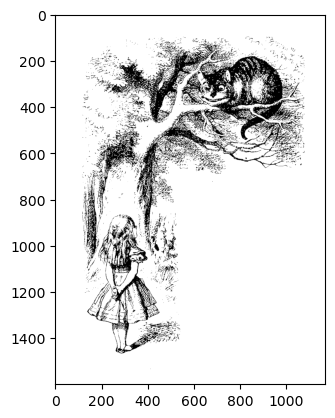

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

gif_path = "p5_image.gif"
image = Image.open(gif_path)
image_array = np.array(image)  

plt.imshow(image_array, cmap='gray') # shows the original image


\newpage

## Q2_p2

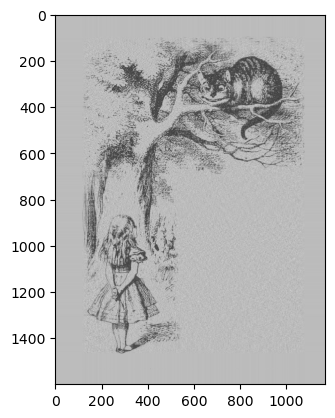

In [22]:
k = 150

U, s, Vh = np.linalg.svd(image_array)
Uk = U[:, :k]
sk = s[:k]
Vk = Vh[:k, :]
image_array_k = Uk @ np.diag(sk) @ Vk
image_array_k = (image_array_k - np.min(image_array_k)) / (np.max(image_array_k) - np.min(image_array_k)) # normalize to [0, 1]

plt.imshow(image_array_k, cmap='gray')

## Q2_p3

- We stop at k = 1170 as the original image is 1600x1170, meaning that the rank of the image matrix is at most 1170.

\newpage

## Q2_p4

In [23]:
print(f"Original image shape: {image_array.shape}")
print(f"Uk shape: {Uk.shape}")
print(f"sk shape: {sk.shape}")
print(f"Vk shape: {Vk.shape}")
print()

as_matrix = image_array.shape[0]*image_array.shape[1]
as_rank_k = Uk.shape[0]*Uk.shape[1] + sk.shape[0] + Vk.shape[0]*Vk.shape[1]
print("memory for saving as a matrix: ",as_matrix)
print("memory for saving as rank-150 approximation: ",as_rank_k)
print(f"we can save {(as_matrix - as_rank_k)/as_matrix * 100}% of the memory")

Original image shape: (1600, 1170)
Uk shape: (1600, 150)
sk shape: (150,)
Vk shape: (150, 1170)

memory for saving as a matrix:  1872000
memory for saving as rank-150 approximation:  415650
we can save 77.79647435897435% of the memory


## Q2_p5
- First k singular vectors can capture dominant low-frequency structures like brightness gradients and the overall structure of the picture, so details emerge gradually as k increases. This is the reason why details of the drawing are visible even at relatively low k.
- $k^{th}$ - $r^{th}$ singular vectors capture the high-frequency noise and subtle variations like artifacts. Truncating these terms removes noise but leaves residual low-frequency haze.
- Tiny noise in white areas spreads energy across all of singular values, requiring higher k to eliminate fully.